In [71]:
### import the needed libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

import calendar

In [72]:
os.chdir('/Users/reinaldodeoliveiramaciel/Desktop/Reinaldo/202002/03022020/bikesharing/Bike-Sharing-Dataset')

In [73]:
###importing data
diario = pd.read_csv('day.csv')
diario.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [74]:
### converts some data


def diaSemana(dia_numero):
    if dia_numero == 0:
        return 'domingo'
    if dia_numero == 1:
        return 'segunda'
    if dia_numero == 2:
        return 'terca'
    if dia_numero == 3:
        return 'quarta'
    if dia_numero == 4:
        return 'quinta'
    if dia_numero == 5:
        return 'sexta'
    if dia_numero == 6:
        return 'sabado'
    
def climaDia(weasit):
    if weasit == 1:
        return 'Céu Limpo'
    if weasit == 2:
        return 'Nublado'
    if weasit == 3:
        return 'Neve'
    if weasit == 4:
        return 'Chuva'
    
def trataFeriado(feriado):
    if feriado == 0:
        return 'Dia Útil'
    if feriado == 1:
        return 'Feriado'
def trataMes(mes):
    if mes == 1:
        return 'Janeiro'
    if mes == 2:
        return 'Fevereiro'
    if mes == 3:
        return 'Março'
    if mes == 4:
        return 'Abril'
    if mes == 5:
        return 'Maio'
    if mes == 6:
        return 'Junho'
    if mes == 7:
        return 'Julho'
    if mes == 8:
        return 'Agosto'
    if mes == 9:
        return 'Setembro'
    if mes == 10:
        return 'Outubro'
    if mes == 11:
        return 'Novembro'
    if mes == 12:
        return 'Dezembro'
    
def trataEstacao(estacao):
    #1:winter, 2:spring, 3:summer, 4:fall
    if estacao == 1:
        return 'inverno'
    if estacao == 2:
        return 'primavera'
    if estacao == 3:
        return 'verão'
    if estacao == 4:
        return 'outono'
diario['weekday'] = diario['weekday'].apply(diaSemana)
diario['weathersit'] = diario['weathersit'].apply(climaDia)
diario['holiday'] = diario['holiday'].apply(trataFeriado)
diario['mnth'] = diario['mnth'].apply(trataMes)
diario['season'] = diario['season'].apply(trataEstacao)

Qual o dia com maior número de bicicletas compartilhadas?

In [75]:
diario.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,inverno,0,Janeiro,Dia Útil,sabado,0,Nublado,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,inverno,0,Janeiro,Dia Útil,domingo,0,Nublado,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,inverno,0,Janeiro,Dia Útil,segunda,1,Céu Limpo,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,inverno,0,Janeiro,Dia Útil,terca,1,Céu Limpo,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,inverno,0,Janeiro,Dia Útil,quarta,1,Céu Limpo,0.226957,0.229270,0.436957,0.186900,82,1518,1600


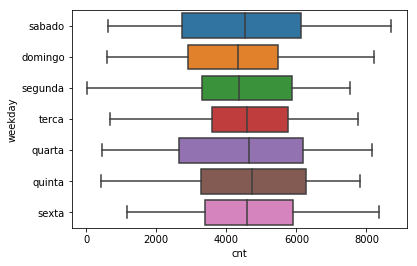

In [76]:
#diario['weekday'] = diario['weekday'].astype(str)
sns.boxplot(x='cnt', y = 'weekday', data=diario)

Deste primeiro plot é possível concluir que por dia da semana os alugueis de bicicleta ocorrem aproximadamente igualmente, com pouca diferenciação entre os dias que mais tem dos que menos tem. As medianas sao aproximadamente iguas e dá para perceber que segunda e quarta feira sao os dias com maiores amplitudes nos aluguéis.

**Aluguel de bicicleta por wheather situation: **

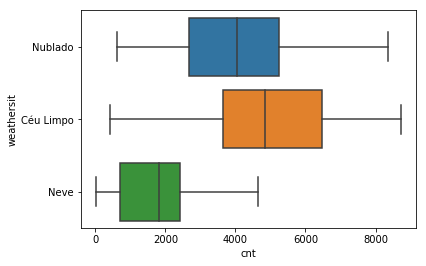

In [77]:
sns.boxplot(x='cnt', y = 'weathersit', data=diario)

Claramente nos dias de Neve pode se perceber um aluguel menor de bicicletas. Assim sendo, é de se esperar que a humidade relativa do ar possua uma correlacao negativa com a quantidade de bicicletas compartilhadas.

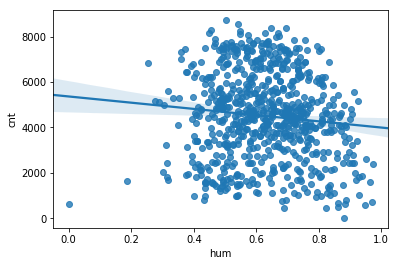

In [78]:
sns.regplot(x='hum', y='cnt', data=diario)

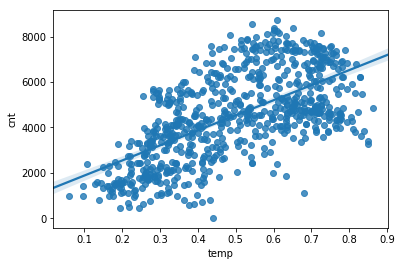

In [79]:
sns.regplot(x='temp', y='cnt', data=diario)

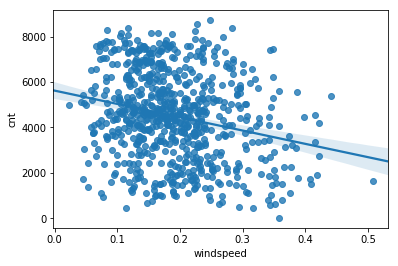

In [80]:
sns.regplot(x='windspeed', y='cnt', data=diario)

Agora visualizando os dias que sao feriados:

É possível verificar que em feriados existe uma demanda maior do que em dias úteis.

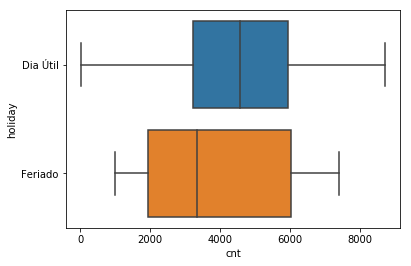

In [81]:
sns.boxplot(x='cnt', y = 'holiday', data=diario)

PairPlot

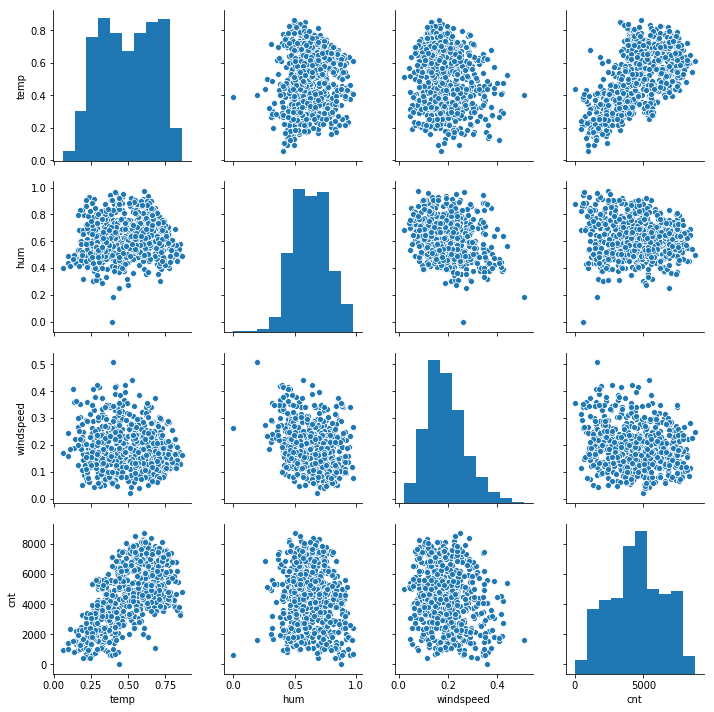

In [82]:
sns.pairplot(diario[['temp','hum','windspeed','cnt']])

O Aluguel de bicicleta ao longo dos meses mostra que o mes sim é um grande diferencial. Percebe-se que nos meses mais quentes (verao no hemisfério norte) existe maior bike sharing.

/Users/reinaldodeoliveiramaciel/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


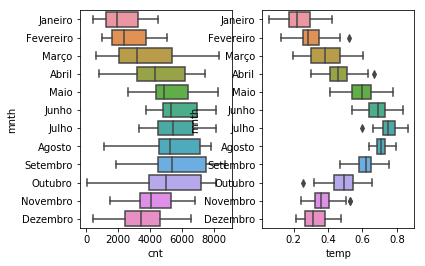

In [83]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x='cnt', y = 'mnth', data=diario, ax=ax[0])
sns.boxplot(x='temp', y = 'mnth', data=diario, ax=ax[1])
fig.show()

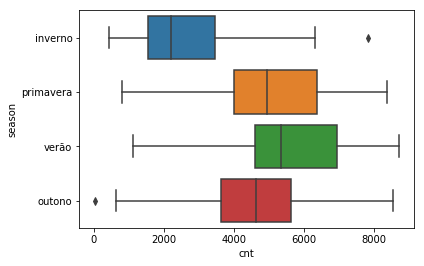

In [84]:
sns.boxplot(x='cnt', y='season', data=diario)

O que deu para descobrir até aqui:
    - o mes do ano tem um impacto crucial na quantidade de bicicletas compartilhadas;
    - o dia da semana nao possui tanta relevancia, se olhado isoladamente;
    - A temperatura tem alguma correlacao com a quantidade de bicicletas compartilhadas.

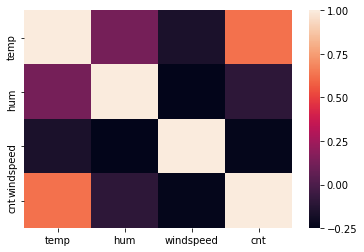

In [85]:
sns.heatmap(diario[['temp','hum','windspeed','cnt']].corr())